In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

from data_utils import get_image_folders

# Get iterator 

In [3]:
train_folder, _ = get_image_folders()

train_iterator = DataLoader(
    train_folder, batch_size=30, shuffle=True
)

# Get decoder

In [4]:
data_dir = '/home/ubuntu/data/tiny-imagenet-200/'

In [5]:
class_names = pd.read_csv(data_dir + 'words.txt', sep='\t', header=None)
class_names.columns = ['code', 'description']

In [6]:
decoder = {}
for i, row in class_names.iterrows():
    decoder[row.code] = row.description

In [7]:
# class index to human readable format
index_to_name = {
    train_folder.class_to_idx[code]: decoder[code] 
    for code in train_folder.class_to_idx
}

# Get a random batch

In [8]:
k = 0
for x_batch, y_batch in train_iterator:
    k += 1
    if k > 1:
        break

# Show some pictures

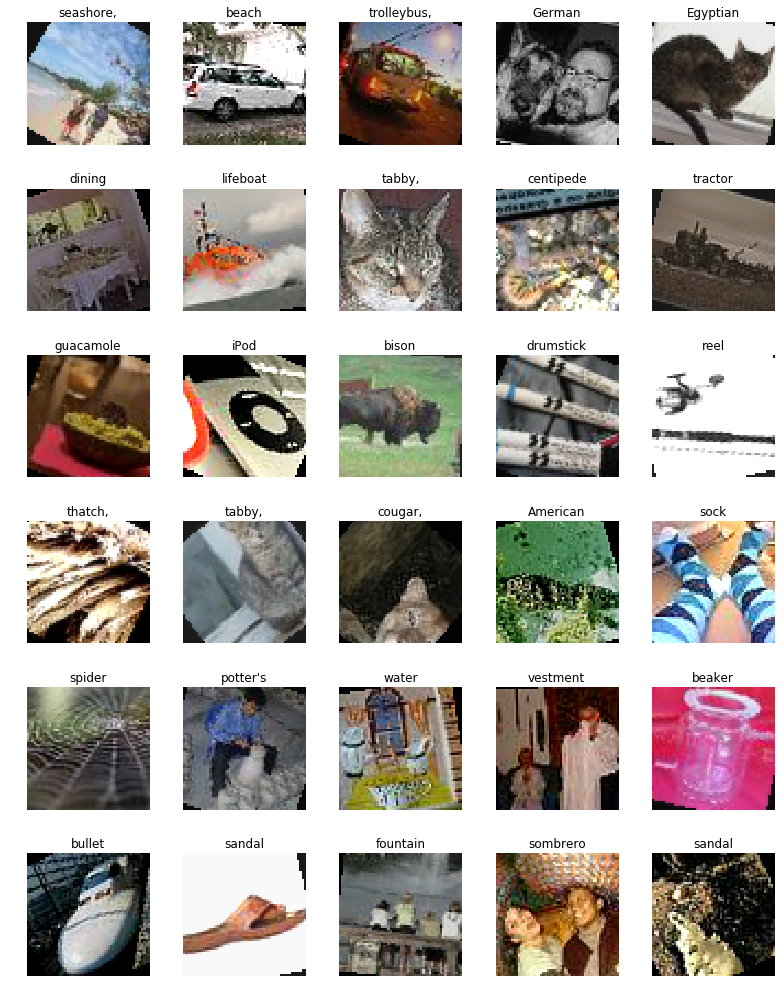

In [9]:
pictures = x_batch.numpy().copy()
true_classes = y_batch.numpy().copy()

# to NHWC format 
pictures = np.transpose(pictures, axes=(0, 2, 3, 1))

# reverse normalization
mean = np.array([0.485, 0.456, 0.406], dtype='float32')
std = np.array([0.229, 0.224, 0.225], dtype='float32')
pictures *= std
pictures += mean
    
# show pictures
_, axes = plt.subplots(nrows=6, ncols=5, figsize=(11, 14))
axes = axes.flatten()
for i, pic in enumerate(pictures):
    axes[i].set_axis_off();
    axes[i].imshow(pic);
    axes[i].set_title(index_to_name[true_classes[i]].split(' ')[0])

plt.tight_layout()